In [ ]:
from google.colab import drive
drive.mount('/content/drive')
drive_folder = '/content/drive/Shareddrives/682_Drive'
# Adjust this line to be the assignment1 folder in your google drive
notebook_folder = drive_folder + '/682-Project'
%cd {notebook_folder}

Mounted at /content/drive
/content/drive/Shareddrives/682_Drive/682-Project


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install pandas torch transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
import pandas as pd
import torch
import re
from datasets import load_dataset
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline, AutoModelForSeq2SeqLM, AutoConfig


##Data Preparation for AG News Dataset
In this section, we will process the AG News dataset, sourced from Hugging Face's datasets library, to create an imbalanced dataset suitable for analysis. The AG News dataset contains four classes of news articles:

World (label 0)
Sports (label 1)
Business (label 2)
Sci/Tech (label 3)
Process Overview
Data Loading:
The AG News dataset will be loaded and converted into a Pandas DataFrame to enable easier manipulation and preprocessing.

Text Preprocessing:
Each article's text will be cleaned by removing special characters, extra spaces, and converting all text to lowercase for uniformity.

Class Separation and Downsampling:

We will separate the dataset by class.
Each class will be downsampled to a specific number of samples to create class imbalance:
World: 4,000 samples
Sports: 7,000 samples
Business: 3,000 samples
Sci/Tech: 2,000 samples
Dataset Reconstruction and Shuffling:
The downsampled data from all classes will be combined, and the resulting dataset will be shuffled to ensure the samples are randomized.

Class Distribution Check:
A summary of the new class distribution will be printed to confirm the imbalance.

Saving the Dataset:
The imbalanced dataset will be saved as a CSV file in Google Drive for future use in experiments, such as training baseline models or data augmentation studies.

This process allows us to simulate a real-world scenario where some classes are underrepresented

In [ ]:
# Load the AG News dataset from Hugging Face's `datasets` library
dataset = load_dataset('ag_news', split='train')

# Convert to a DataFrame for easier manipulation
data = dataset.to_pandas()

# Text cleaning function
def clean_text(text):
    text = re.sub(r'[^A-Za-z0-9\s]+', '', text)  # Remove non-alphanumeric characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text.strip().lower()  # Convert to lowercase and remove trailing spaces

# Apply cleaning to the dataset
data['text'] = data['text'].apply(clean_text)

# Separate classes
world_data = data[data['label'] == 0]      # Class 0: World
sports_data = data[data['label'] == 1]     # Class 1: Sports
business_data = data[data['label'] == 2]   # Class 2: Business
sci_tech_data = data[data['label'] == 3]   # Class 3: Sci/Tech

# Downsample each class to different levels to create imbalance
world_data_downsampled = world_data.sample(n=500, random_state=42)    # 4000 samples
sports_data_downsampled = sports_data.sample(n=7000, random_state=42)  # 7000 samples
business_data_downsampled = business_data.sample(n=3000, random_state=42)  # 3000 samples
sci_tech_data_downsampled = sci_tech_data.sample(n=2000, random_state=42)  # 2000 samples

# Combine the datasets back to create the imbalanced dataset
imbalanced_data = pd.concat([
    world_data_downsampled,
    sports_data_downsampled,
    business_data_downsampled,
    sci_tech_data_downsampled
])

# Shuffle the dataset
imbalanced_data = imbalanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the class distribution
print("Class distribution in the imbalanced dataset:")
print(imbalanced_data['label'].value_counts())

# Save the imbalanced dataset to a CSV file
imbalanced_data.to_csv('/content/drive/Shareddrives/682_Drive/682-Project/ag_news_train_imbalanced.csv', index=False)


# OLD Data Preparation for AG News Dataset

In this section, we will load the AG News dataset from Hugging Face's `datasets` library and convert it into a Pandas DataFrame for easier manipulation. The dataset contains four classes of news articles: World (0), Sports (1), Business (2), and Sci/Tech (3). To create an imbalanced dataset for our analysis, we will downsample the "World" category to 5,000 samples while keeping the other classes intact. After combining the datasets, we will shuffle the resulting dataset to ensure randomness and then check the class distribution to confirm the imbalance. Finally, the imbalanced dataset will be saved as a CSV file for future use.


In [ ]:
# import pandas as pd
# import re

# # Load the AG News dataset from Hugging Face's `datasets` library
# dataset = load_dataset('ag_news', split='train')

# # Convert to a DataFrame for easier manipulation
# data = dataset.to_pandas()

# def clean_text(text):
#     # Remove special characters and extra spaces
#     text = re.sub(r'[^A-Za-z0-9\s]+', '', text)  # Remove non-alphanumeric characters
#     text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
#     return text.strip().lower()  # Convert to lowercase and remove trailing spaces

# # Apply cleaning to the dataset
# def preprocess_data(row):
#     row['text'] = clean_text(row['text'])
#     return row

# # Use apply to process each row
# data = data.apply(preprocess_data, axis=1)

# # The classes are numbered as follows:
# # 0: World, 1: Sports, 2: Business, 3: Sci/Tech

# # Separate each class
# world_data = data[data['label'] == 0]      # Class 0: World
# sports_data = data[data['label'] == 1]     # Class 1: Sports
# business_data = data[data['label'] == 2]   # Class 2: Business
# sci_tech_data = data[data['label'] == 3]   # Class 3: Sci/Tech

# # Downsample the "World" category to 5,000 samples to create imbalance
# world_data_downsampled = world_data.sample(n=5000, random_state=42)

# # Combine the datasets back to create an imbalanced dataset
# imbalanced_data = pd.concat([world_data_downsampled, sports_data, business_data, sci_tech_data])

# # Shuffle the dataset
# imbalanced_data = imbalanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# # Check the class distribution
# print("Class distribution in imbalanced dataset:")
# print(imbalanced_data['label'].value_counts())

# # If you want to save the imbalanced dataset as a CSV
# imbalanced_data.to_csv('/content/drive/Shareddrives/682_Drive/682-Project/ag_news_train_imbalanced.csv', index=False)



Class distribution in imbalanced dataset:
label
2    30000
1    30000
3    30000
0     5000
Name: count, dtype: int64


In [ ]:
def load_news_dataset(path):
    # Load the dataset
    data = pd.read_csv(file_path)

    # Display the first few rows of the dataframe
    print(data.head())
    return data

# Specify the path to your CSV file
# file_path = '/content/drive/Shareddrives/682_Drive/682-Project/ag_news_imbalanced.csv'

# dataset = load_news_dataset(file_path)

In [ ]:
# !pip uninstall bitsandbytes -y
# !pip cache purge
# !pip install bitsandbytes==0.44.1 --no-cache-dir
!pip install bitsandbytes
# !pip install -U bitsandbytes
!pip install -U transformers accelerate
from transformers import BitsAndBytesConfig

In [ ]:

# Configure the quantization
quantization_config = BitsAndBytesConfig(
    load_in_8bit=True,  # or load_in_4bit=True if you want 4-bit
)
HF_token= '<insert_token>'
# Load a tokenizer and model for Llama (replace with actual Llama-3.2 model path if needed)
model_name = 'meta-llama/Meta-Llama-3.1-8B-Instruct'  # Use the specific Llama version you have
tokenizer = AutoTokenizer.from_pretrained(model_name, token=HF_token)
model = AutoModelForCausalLM.from_pretrained(model_name, quantization_config=quantization_config, token=HF_token)


# Load the configuration
config = AutoConfig.from_pretrained(model_name, token=HF_token)

print("Model loaded successfully!")


In [ ]:
model.save_pretrained("/content/drive/Shareddrives/682_Drive/LLAMA-Model")

In [ ]:
tokenizer.save_pretrained("/content/drive/Shareddrives/682_Drive/LLAMA-Model")

('/content/drive/Shareddrives/682_Drive/LLAMA-Model/tokenizer_config.json',
 '/content/drive/Shareddrives/682_Drive/LLAMA-Model/special_tokens_map.json',
 '/content/drive/Shareddrives/682_Drive/LLAMA-Model/tokenizer.json')

In [ ]:
model = AutoModelForCausalLM.from_pretrained("/content/drive/Shareddrives/682_Drive/LLAMA-Model")
tokenizer = AutoTokenizer.from_pretrained("/content/drive/Shareddrives/682_Drive/LLAMA-Model")


Unused kwargs: ['_load_in_4bit', '_load_in_8bit', 'quant_method']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.
`low_cpu_mem_usage` was None, now default to True since model is quantized.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]


## Text Augmentation using Tonality Style Transfer - OLD CODE

In this project, we perform text augmentation on an imbalanced news article dataset to improve representation and variety within the **"World" news category**. Specifically, we apply a **formal-to-informal tone** transfer to the articles in this category, creating additional samples that capture a more conversational or casual style. This approach helps diversify the dataset without altering the original content, providing a richer dataset for downstream tasks.

Using a **Large Language Model**, we implement a prompt-based technique to rewrite each "World" news article in an informal tone. The generated informal text is appended to the original "World" news samples, effectively doubling the sample count for this underrepresented class

In [ ]:
# # Helper function for genre transfer (formal to informal text generation)
# def generate_informal_text(model, tokenizer, text, device, max_length=200):
#     # Add a prompt to instruct the model to generate an informal version
#     prompt = f"Rewrite the following news article in an informal \\
#     tone:\n\n{text}\n\nInformal version:"

#     text_len = len(tokenizer(text, return_tensors="pt").input_ids[0])
#     print(f"text_len:{text_len}")
#     max_length=2*text_len + 10
#     inputs = tokenizer(prompt, return_tensors="pt").to(device)
#     with torch.no_grad():
#         outputs = model.generate(
#             inputs.input_ids,
#             max_length=max_length,
#             do_sample=True,
#             top_k=50,
#             top_p=0.9,
#             temperature=0.7
#         )
#     generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
#     informal_text = generated_text.split("Informal version:", 1)[-1].strip()
#     informal_text = informal_text.split("Note:", 1)[0].strip()
#     return informal_text


In [ ]:
text = ("U.S. Jets Pound Militant Positions in Iraq U.S. jets pounded suspected Shiite militant positions in the "
        "Baghdad slum of Sadr City on Monday, killing at least five people and wounding 40. Elsewhere, insurgents "
        "detonated a car bomb and fired rockets, killing at least four National Guardsmen, in separate attacks "
        "targeting Iraq's beleaguered security forces.")

# Tokenize the text and count tokens
token_count = len(tokenizer(text, return_tensors="pt").input_ids[0])
print("Number of tokens in the original text:", token_count)

In [ ]:
# import pandas as pd
# import torch
# from tqdm import tqdm
# import os

# # File paths
# input_file_path = '/content/drive/Shareddrives/682_Drive/682-Project/ag_news_train_imbalanced.csv'
# output_file_path = '/content/drive/Shareddrives/682_Drive/682-Project/ag_news_with_LLM_augmented_world.csv'

# # Load the dataset
# imbalanced_dataset = load_news_dataset(input_file_path)
# print(imbalanced_dataset.head())
# world_data = imbalanced_dataset[imbalanced_dataset['label'] == 0]

# # Device configuration
# device = 'cuda' if torch.cuda.is_available() else 'cpu'

# # Initialize or load progress tracker
# try:
#     # Load existing output file to determine the starting point
#     processed_data = pd.read_csv(output_file_path)
#     start_index = len(processed_data[processed_data['label'] == 0])
# except FileNotFoundError:
#     # Start from scratch if output file doesn't exist
#     start_index = 0

# # Set batch size
# batch_size = 50
# num_batches = (len(world_data) - start_index) // batch_size + 1

# # Process data in batches
# for batch_num in range(num_batches):
#     batch = world_data[start_index + batch_num * batch_size :
#                        start_index + (batch_num + 1) * batch_size]
#     augmented_texts = []

#     for text in tqdm(batch['text'], desc=f"Processing batch {batch_num + 1}"):
#         informal_text = generate_informal_text(model, tokenizer, text, device)
#         augmented_texts.append(informal_text)

#     # Create a DataFrame for this batch of augmented texts
#     augmented_batch = pd.DataFrame({
#         'text': augmented_texts,
#         'label': 0
#     })

#     # Append the batch results to the output file
#     with open(output_file_path, 'a') as f:
#         augmented_batch.to_csv(f, header=f.tell() == 0, index=False)

#     print((
#     f"Completed batch {batch_num + 1}, "
#     f"processed {len(augmented_batch)} texts."
# ))

# print("Batch processing complete!")

# # Load the augmented data and combine it with other classes to create the final dataset
# augmented_world_data = pd.read_csv(output_file_path)
# sports_data = imbalanced_dataset[imbalanced_dataset['label'] == 1]
# business_data = imbalanced_dataset[imbalanced_dataset['label'] == 2]
# sci_tech_data = imbalanced_dataset[imbalanced_dataset['label'] == 3]

# # Combine and shuffle the dataset, then save to CSV
# final_data = pd.concat([augmented_world_data, sports_data, business_data, sci_tech_data]).sample(frac=1, random_state=42).reset_index(drop=True)
# final_data.to_csv(output_file_path, index=False)

# print("Class distribution in the augmented dataset:")
# print(final_data['label'].value_counts())


Output hidden; open in https://colab.research.google.com to view.

## Text Augmentation using Tonality Style Transfer - NEW CODE

In [ ]:
# Function to generate augmented samples in batches
def generate_augmented_samples(model, tokenizer, prompt, num_samples, device, max_new_tokens=200):
    # Set pad_token to eos_token if not already set
    if tokenizer.pad_token is None:
        tokenizer.pad_token = tokenizer.eos_token

    inputs = tokenizer(prompt, return_tensors="pt", padding=True, truncation=True).to(device)

    with torch.no_grad():
        outputs = model.generate(
            inputs.input_ids,
            attention_mask=inputs.attention_mask,
            num_return_sequences=num_samples,
            do_sample=True,
            top_k=50,
            top_p=0.9,
            temperature=0.7,
            max_new_tokens=max_new_tokens,
            pad_token_id=tokenizer.pad_token_id  # Use pad_token_id
        )

    generated_texts = [tokenizer.decode(output, skip_special_tokens=True) for output in outputs]

    # Extract only the newly generated examples
    augmented_texts = []
    for text in generated_texts:
        new_examples = text.split("Examples:")[-1].strip()
        augmented_texts.append(new_examples)

    return augmented_texts


In [ ]:
import pandas as pd
import torch
from tqdm import tqdm
import os
import random

# File paths
input_file_path = '/content/drive/Shareddrives/682_Drive/682-Project/ag_news_train_imbalanced.csv'
output_file_path = '/content/drive/Shareddrives/682_Drive/682-Project/ag_news_with_LLM_augmented_world.csv'
random_samples_path = '/content/drive/Shareddrives/682_Drive/682-Project/random_samples.csv'
augmented_samples_path = '/content/drive/Shareddrives/682_Drive/682-Project/augmented_samples.csv'

# Load the dataset
imbalanced_dataset = pd.read_csv(input_file_path)
world_data = imbalanced_dataset[imbalanced_dataset['label'] == 0]

# Device configuration
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Initialize or load progress tracker
try:
    processed_data = pd.read_csv(output_file_path)
    start_index = len(processed_data[processed_data['label'] == 0])
except FileNotFoundError:
    start_index = 0

# Set the number of augmented samples you want to generate
total_augmented_samples = 200
batch_size = 10
num_batches = total_augmented_samples // batch_size

# Step 1: Randomly select 10 samples from the "World News" class
random_samples = world_data.sample(n=10, random_state=42)['text'].tolist()

# Save the 10 random samples for analysis
pd.DataFrame({'text': random_samples}).to_csv(random_samples_path, index=False)

# Step 2: Create a detailed base prompt using the selected samples
base_prompt = (
    "Generate detailed news articles for the 'World News' category. "
)
for i, sample in enumerate(random_samples):
    base_prompt += f"Example {i+1}: {sample}\n\n"
base_prompt += "\nWrite separate news articles, each ending with '<|endofarticle|>':\n"

# Function to generate augmented samples
def generate_augmented_samples(model, tokenizer, prompt, num_samples, device):
    inputs = tokenizer(prompt, return_tensors="pt").to(device)
    outputs = model.generate(
        **inputs,
        max_new_tokens=100,   # Adjust as needed for a full article length
        num_return_sequences=num_samples,
        do_sample=True,
        temperature=0.7,
        top_p=0.9,
        eos_token_id=tokenizer.encode("<|endofarticle|>", add_special_tokens=False)[0]
    )
    augmented_texts = [tokenizer.decode(output, skip_special_tokens=True) for output in outputs]
    return augmented_texts

# Step 3: Generate augmented texts in batches
all_augmented_texts = []
for batch_num in tqdm(range(num_batches), desc="Generating batches"):
    batch_augmented_texts = generate_augmented_samples(
        model,
        tokenizer,
        base_prompt,
        batch_size,
        device
    )
    all_augmented_texts.extend(batch_augmented_texts)

# Step 4: Process the generated outputs
# Split articles based on the '<|endofarticle|>' separator
final_articles = []
for text in all_augmented_texts:
    articles = text.split("<|endofarticle|>")
    final_articles.extend([article.strip() for article in articles if article.strip()])

# Step 5: Save augmented samples for analysis
augmented_df = pd.DataFrame({'text': final_articles[:total_augmented_samples], 'label': 0})
augmented_df.to_csv(augmented_samples_path, index=False)

# Step 6: Append the augmented texts to the original dataset
combined_world_data = pd.concat([world_data, augmented_df]).reset_index(drop=True)
combined_world_data.to_csv(output_file_path, mode='a', header=not os.path.exists(output_file_path), index=False)

print(f"Successfully augmented {len(final_articles[:total_augmented_samples])} texts for the 'World News' class.")

# Step 7: Load the augmented data and combine it with other classes
augmented_world_data = pd.read_csv(output_file_path)
sports_data = imbalanced_dataset[imbalanced_dataset['label'] == 1]
business_data = imbalanced_dataset[imbalanced_dataset['label'] == 2]
sci_tech_data = imbalanced_dataset[imbalanced_dataset['label'] == 3]

# Combine and shuffle the dataset, then save to CSV
final_data = pd.concat([augmented_world_data, sports_data, business_data, sci_tech_data]).sample(frac=1, random_state=42).reset_index(drop=True)
final_data.to_csv(output_file_path, index=False)

print("Class distribution in the augmented dataset:")
print(final_data['label'].value_counts())


## Traditional Data Augmentation Method: Synonym Replacement
Here is code snippet that applies **traditional synonym replacement** for text augmentation on the imbalanced AG News dataset. For this, we'll use the **WordNet** lexical database from the **nltk library as our source for synonyms**.

How the Algorithm Works?

1. Identify Synonyms: For each sentence, randomly select a few words and check if they have synonyms in WordNet.

2. Replace Words with Synonyms: Replace selected words with a random synonym. The number of words replaced can be controlled by a parameter.

3. Create Augmented Data: The modified sentences are added to the dataset to increase examples for the minority class.
Double Augmentation Step:

4. After the first synonym replacement augmentation for the "World" class, the combined dataset (augmented_dataset) undergoes an additional round of synonym replacement on all classes. This further diversifies the dataset by introducing more variation into each text sample.
Evaluation and Plot:

The model accuracy and F1 score on the "World" class are calculated both for the original dataset and the doubly augmented dataset.

The bar chart illustrates these metrics, allowing you to compare the model’s improvement on the overall dataset and on the underrepresented class.
This code will apply synonym replacement to the “World” class examples in the AG News dataset, which we previously downsampled for imbalance.




In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import nltk
from nltk.corpus import wordnet as wn


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Original Imbalanced Dataset Sample:
                                                text  label
0  Update 5: Oil Prices Rise After Government Rep...      2
1  Audibled audible stokes Boilers When Purdue qu...      1
2  Legacy key element of bid paper A massive inje...      1
3  Update 1: Ex-Disney Director Testifies About E...      2
4  IBM Net Flat; Says Confident on Outlook  NEW Y...      2

Original Model Performance:
Accuracy: 0.9259649122807018
F1 Scores by Class: [0.81022172 0.97794158 0.90773511 0.90896097]

Single Augmentation Model Performance:
Accuracy: 0.9231333333333334
F1 Scores by Class: [0.88125995 0.97508233 0.90190842 0.90504516]

Double Augmentation Model Performance:
Accuracy: 0.9194666666666667
F1 Scores by Class: [0.87253333 0.97417055 0.89743161 0.90088505]


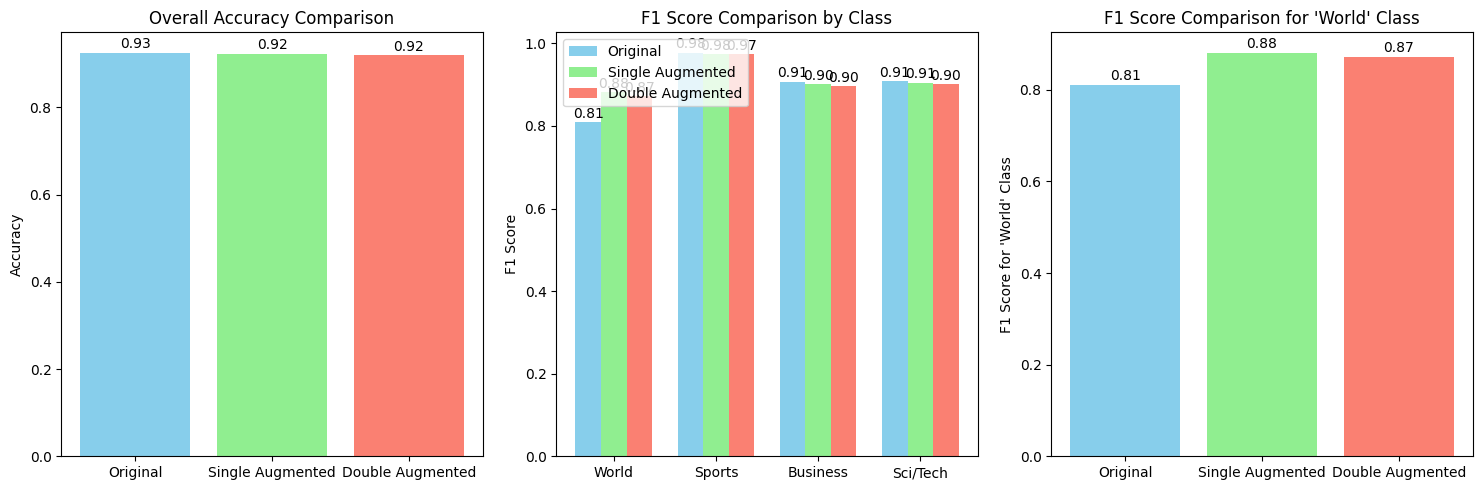

In [ ]:
# Download WordNet data for synonyms
nltk.download('wordnet')

# Load the dataset function
def load_news_dataset(file_path):
    data = pd.read_csv(file_path)
    print("Original Imbalanced Dataset Sample:")
    print(data.head())
    return data

# Synonym replacement function
def get_synonyms(word):
    synonyms = set()
    for syn in wn.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name())
    if word in synonyms:
        synonyms.remove(word)
    return list(synonyms)

def synonym_replacement(sentence, n=1):
    words = sentence.split()
    new_words = words.copy()
    random_word_list = list(set([word for word in words if get_synonyms(word)]))
    random.shuffle(random_word_list)
    num_replaced = 0

    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        if len(synonyms) >= 1:
            synonym = random.choice(synonyms)
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n:
            break

    return ' '.join(new_words)

# Load original imbalanced dataset
file_path = '/content/drive/Shareddrives/682_Drive/682-Project/ag_news_imbalanced.csv'
dataset = load_news_dataset(file_path)

# Step 1: Original Model Evaluation
X_original = dataset['text']
y_original = dataset['label']
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_original, y_original, test_size=0.3, random_state=42)

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_orig_tfidf = vectorizer.fit_transform(X_train_orig)
X_test_orig_tfidf = vectorizer.transform(X_test_orig)

# Train a logistic regression classifier on original dataset
model_orig = LogisticRegression(max_iter=1000, random_state=42)
model_orig.fit(X_train_orig_tfidf, y_train_orig)

# Evaluate model on original dataset
y_pred_orig = model_orig.predict(X_test_orig_tfidf)
original_accuracy = accuracy_score(y_test_orig, y_pred_orig)
original_f1_scores = f1_score(y_test_orig, y_pred_orig, average=None)

# Print results for original dataset
print("\nOriginal Model Performance:")
print("Accuracy:", original_accuracy)
print("F1 Scores by Class:", original_f1_scores)

# Step 2: Single Augmentation (only augment "World" class)
world_data = dataset[dataset['label'] == 0].copy()
world_data['text'] = world_data['text'].apply(lambda x: synonym_replacement(x, n=2))
single_augmented_dataset = pd.concat([dataset, world_data])

# Prepare single augmented dataset for training
X_single_aug = single_augmented_dataset['text']
y_single_aug = single_augmented_dataset['label']
X_train_aug_single, X_test_aug_single, y_train_aug_single, y_test_aug_single = train_test_split(X_single_aug, y_single_aug, test_size=0.3, random_state=42)

# Convert single augmented text to TF-IDF features
X_train_single_aug_tfidf = vectorizer.fit_transform(X_train_aug_single)
X_test_single_aug_tfidf = vectorizer.transform(X_test_aug_single)

# Train logistic regression on single augmented dataset
model_aug_single = LogisticRegression(max_iter=1000, random_state=42)
model_aug_single.fit(X_train_single_aug_tfidf, y_train_aug_single)

# Evaluate model on single augmented dataset
y_pred_aug_single = model_aug_single.predict(X_test_single_aug_tfidf)
single_augmented_accuracy = accuracy_score(y_test_aug_single, y_pred_aug_single)
single_augmented_f1_scores = f1_score(y_test_aug_single, y_pred_aug_single, average=None)

# Print results for single augmented dataset
print("\nSingle Augmentation Model Performance:")
print("Accuracy:", single_augmented_accuracy)
print("F1 Scores by Class:", single_augmented_f1_scores)

# Step 3: Double Augmentation (augment all classes)
augmented_dataset = single_augmented_dataset.copy()
augmented_dataset['text'] = augmented_dataset['text'].apply(lambda x: synonym_replacement(x, n=2))

# Prepare double augmented dataset for training
X_double_aug = augmented_dataset['text']
y_double_aug = augmented_dataset['label']
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(X_double_aug, y_double_aug, test_size=0.3, random_state=42)

# Convert double augmented text to TF-IDF features
X_train_double_aug_tfidf = vectorizer.fit_transform(X_train_aug)
X_test_double_aug_tfidf = vectorizer.transform(X_test_aug)

# Train logistic regression on double augmented dataset
model_aug_double = LogisticRegression(max_iter=1000, random_state=42)
model_aug_double.fit(X_train_double_aug_tfidf, y_train_aug)

# Evaluate model on double augmented dataset
y_pred_aug = model_aug_double.predict(X_test_double_aug_tfidf)
double_augmented_accuracy = accuracy_score(y_test_aug, y_pred_aug)
double_augmented_f1_scores = f1_score(y_test_aug, y_pred_aug, average=None)

# Print results for double augmented dataset
print("\nDouble Augmentation Model Performance:")
print("Accuracy:", double_augmented_accuracy)
print("F1 Scores by Class:", double_augmented_f1_scores)

# Plotting results
class_labels = ['World', 'Sports', 'Business', 'Sci/Tech']
x = np.arange(len(class_labels))
width = 0.25

plt.figure(figsize=(15, 5))

# Overall Accuracy Comparison
plt.subplot(1, 3, 1)
plt.bar(['Original', 'Single Augmented', 'Double Augmented'], [original_accuracy, single_augmented_accuracy, double_augmented_accuracy], color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel("Accuracy")
plt.title("Overall Accuracy Comparison")
for i, v in enumerate([original_accuracy, single_augmented_accuracy, double_augmented_accuracy]):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')

# Class-wise F1 Score Comparison
plt.subplot(1, 3, 2)
plt.bar(x - width, original_f1_scores, width, label='Original', color='skyblue')
plt.bar(x, single_augmented_f1_scores, width, label='Single Augmented', color='lightgreen')
plt.bar(x + width, double_augmented_f1_scores, width, label='Double Augmented', color='salmon')
plt.xticks(ticks=x, labels=class_labels)
plt.ylabel("F1 Score")
plt.title("F1 Score Comparison by Class")
plt.legend()
for i in range(len(class_labels)):
    plt.text(i - width, original_f1_scores[i] + 0.01, f"{original_f1_scores[i]:.2f}", ha='center')
    plt.text(i, single_augmented_f1_scores[i] + 0.01, f"{single_augmented_f1_scores[i]:.2f}", ha='center')
    plt.text(i + width, double_augmented_f1_scores[i] + 0.01, f"{double_augmented_f1_scores[i]:.2f}", ha='center')

# F1 Score for "World" Class across Stages
plt.subplot(1, 3, 3)
plt.bar(['Original', 'Single Augmented', 'Double Augmented'], [original_f1_scores[0], single_augmented_f1_scores[0], double_augmented_f1_scores[0]], color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel("F1 Score for 'World' Class")
plt.title("F1 Score Comparison for 'World' Class")
for i, v in enumerate([original_f1_scores[0], single_augmented_f1_scores[0], double_augmented_f1_scores[0]]):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')

plt.tight_layout()
plt.show()
